<a href="https://www.kaggle.com/code/chakrabortyarnab/blending-multiple-regressor-predictions?scriptVersionId=119508898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [78]:
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
%matplotlib inline

# Introduction
### 

In [79]:
# Reading train and test data
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [80]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values   
    summary['Uniques'] = df.nunique().values
    summary['Sample Value'] = df.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)
    return summary
resumetable(train)

Dataset Shape: (1460, 81)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,Id,int64,0,1460,1,3.16
1,MSSubClass,int64,0,15,60,0.88
2,MSZoning,object,0,5,RL,0.30
3,LotFrontage,float64,259,110,65.0,1.74
4,LotArea,int64,0,1073,8450,2.92
5,Street,object,0,2,Pave,0.01
6,Alley,object,1369,2,NaN,0.30
7,LotShape,object,0,4,Reg,0.34
8,LandContour,object,0,4,Lvl,0.19
9,Utilities,object,0,2,AllPub,0.00


**Action:**
* Removing customer IDs from the data set as it is unique to every record and we therefore won't use it as a predictor variable.
* Explore both the categorical and numeric columns.
* Handling missing values.
* Converting the Data type of MSSubClass, YrSold, MoSold,  


# Data Pre-processing

In [81]:
#Dropping ID
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

### Combine the Train and test data together
We will combine the datasets together before performing transformations to maintain consistencies between the datasets

In [82]:
# Combining the train and test data
all_data = pd.concat([train, test]).reset_index(drop=True)
sale_price = train["SalePrice"]
all_data.drop(columns = ["SalePrice"] , inplace = True)
all_data.shape

(2919, 79)

In [83]:
#converting the datatype
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Imputing missing values

In [84]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data.drop(columns = ["Utilities"] , inplace = True)
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

### Creating a new Feature
Calculating Total Area in Square foot by adding Basement, 1st Floor and 2nd Floor

In [85]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [86]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [87]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 34 skewed numerical features to Box Cox transform


# Distribution of numeric features

Skewness: 1.882876
Kurtosis: 6.536282


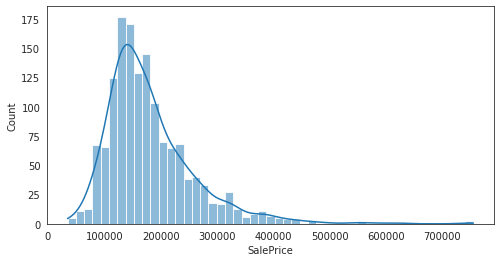

In [88]:
plt.figure(figsize= (8 , 4))
g = sns.histplot(train.SalePrice , kde = True)
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

**Observation:** 
The sale prices are right skewed. 
Few people can afford very expensive houses. 

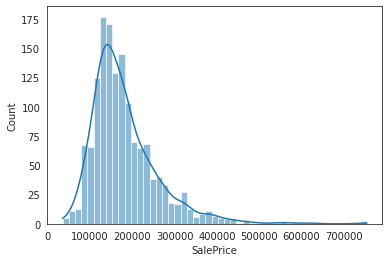

In [89]:
#Perform Log transformation
sale_price = np.log1p(train["SalePrice"])
g = sns.histplot(train.SalePrice , kde = True)

In [90]:
#converting categorical features
all_data = pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(2919, 331)

# Train Test Split

In [91]:
train = all_data[:len(train)]
test_data = all_data[len(train):]
target = sale_price

In [92]:
# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

# Misc
from sklearn.model_selection import GridSearchCV , learning_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

### Error Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [93]:
# We will be using KFold crossvalidation to evaluate model predictions
kf = KFold(n_splits=5, random_state=42, shuffle=True)
scores = {}

# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train , Y=target):
    rmse = np.sqrt(-cross_val_score(model,X, Y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

### Random Forest Regressor
Bagging multiple Decision trees

In [94]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
score = cv_rmse(rf)
print("Random Forest Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['random_forest'] = (score.mean(), score.std())

Random Forest Model: 0.1431 (0.0186)


### Support Vector Regressor
While Decision Tree covers the algebric approach, SVM covers the geometric approach

Since SVM is susceptible to outliers, we will first pass it through a RobustScaler.

In [95]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
score = cv_rmse(svr)
print("Support Vector Machine: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Support Vector Machine'] = (score.mean(), score.std())

Support Vector Machine: 0.1281 (0.0259)


### Light GBM
Boosting multiple decision trees

In [96]:
# Light Gradient Boosting Regressor
lgbm = LGBMRegressor(n_estimators=500, objective='regression',random_state=42)
score = cv_rmse(lgbm)
print("Light Gbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lgbm'] = (score.mean(), score.std())

Light Gbm: 0.1374 (0.0185)


# Blending Multiple Regressor Predictions

In [97]:
rf_data = rf.fit(train , target)
svr_data = svr.fit(train , target)
lgbm_data = lgbm.fit(train , target)

In [98]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.3 * rf_data.predict(X)) + \
            (0.3 * svr_data.predict(X)) + \
            (0.4 * lgbm_data.predict(X)))

In [104]:
# Get final precitions from the blended model
blended_score = rmsle(target, blended_predictions(train))
scores['blended'] = (blended_score,0)
print('RMSE score on train data:')
print(blended_score)

RMSE score on train data:
0.046467225084186554


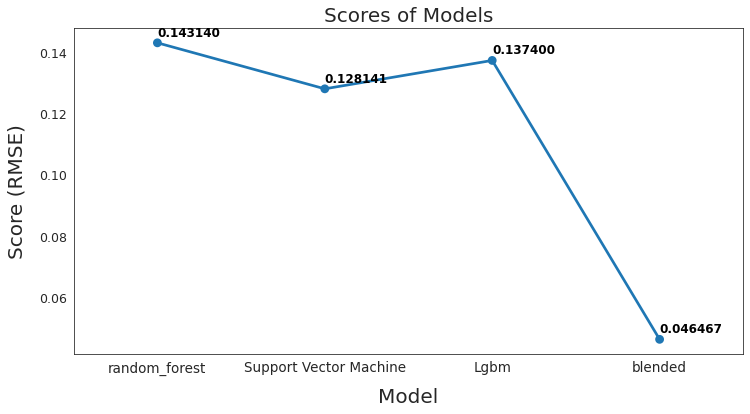

In [105]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(12,6))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

**Observation:**
We can see that the blended model has the lowest rmse

In [101]:
# Read in sample_submission dataframe
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.shape

(1459, 2)

In [102]:
# Append predictions from blended models
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(test_data)))

In [103]:
submission.to_csv("submission.csv", index=False)